##**Importing important packages**

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

import os
from pathlib import Path

import tensorflow as tf

##**Train and validation dataset preparation**

In [7]:
train_dir = 'C:\\Users\\Chetan\\OneDrive - kletech.ac.in\\Desktop\\Indian-Currency-Classification-main\\train\\'   # Address of your training dataset from drive 

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          train_dir, 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(128, 128), 
          shuffle=True, 
          seed=123, 
          validation_split=0.2, 
          subset='training',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          train_dir, 
          labels='inferred', 
          label_mode='int',
          class_names=['10', '20', '50', '100', '200', '500', '2000'], 
          color_mode='rgb', 
          batch_size=32, 
          image_size=(128, 128), 
          shuffle=False, 
          seed=123, 
          validation_split=0.2, 
          subset='validation',
          interpolation='bicubic', 
          follow_links=False, 
          smart_resize=True
        )

Found 1239 files belonging to 7 classes.
Using 992 files for training.
Found 1239 files belonging to 7 classes.
Using 247 files for validation.


In [8]:
def normalize(image,label):
  """
    Returns normalized image and its label(softmax=0-1)
  """
  image = tf.cast(image/255. ,tf.float32) # image represented using floating values
  return image,label

In [9]:
# Normalizing dataset for better accuracy

train_dataset = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

**Check Inference on the saved model**

##**Model Architecture**

In [10]:
model = tf.keras.Sequential([
            
            tf.keras.layers.Conv2D(64, (1, 1), input_shape=(128, 128, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            
            tf.keras.layers.Conv2D(32, (3, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

            tf.keras.layers.Conv2D(16, (3, 3)),
            tf.keras.layers.BatchNormalization(axis=-1),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.50),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.30),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(7),
            tf.keras.layers.Activation('softmax')
          ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      256       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      18464     
                                                                 
 batch_normalization_1 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0

##**Model optimization definition**

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
    )

##**Training Model**

In [13]:
model.fit(train_dataset,epochs=50)

Epoch 1/50
31/31 [==============================] - 67s 2s/step - loss: 2.0676 - accuracy: 0.1744
Epoch 2/50
31/31 [==============================] - 61s 2s/step - loss: 1.7197 - accuracy: 0.3004
Epoch 3/50
31/31 [==============================] - 61s 2s/step - loss: 1.4870 - accuracy: 0.4083
Epoch 4/50
31/31 [==============================] - 61s 2s/step - loss: 1.3573 - accuracy: 0.4476
Epoch 5/50
31/31 [==============================] - 60s 2s/step - loss: 1.2513 - accuracy: 0.4960
Epoch 6/50
31/31 [==============================] - 62s 2s/step - loss: 1.1711 - accuracy: 0.5514
Epoch 7/50
31/31 [==============================] - 62s 2s/step - loss: 1.0902 - accuracy: 0.5565
Epoch 8/50
31/31 [==============================] - 63s 2s/step - loss: 0.9664 - accuracy: 0.6411
Epoch 9/50
31/31 [==============================] - 62s 2s/step - loss: 0.8952 - accuracy: 0.6532
Epoch 10/50
31/31 [==============================] - 63s 2s/step - loss: 0.8088 - accuracy: 0.6855
Epoch 11/50
31/31 [

##**Evaluating the model on the validation dataset**

In [14]:
val_loss, val_acc = model.evaluate(validation_dataset, verbose='auto')
print(f"Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

8/8 [==============================] - 5s 397ms/step - loss: 0.0779 - accuracy: 0.9717
Validation:
	loss:0.07786121219396591 
	accuracy:0.9716598987579346


##**Test Data Prepartion**

###**Extracting test images for results**

In [15]:
test_dir = 'C:\\Users\\Chetan\\OneDrive - kletech.ac.in\\Desktop\\Indian-Currency-Classification-main\\test\\'

test_imageID = []
# r=root, d=directories, f = files

for r, d, f in os.walk(test_dir, topdown=True):
    for file in f:
      if '.jpg' in file:
          test_imageID.append(Path(file).stem)
test_imageID = sorted(test_imageID)

In [16]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
          test_dir, 
          labels=None, 
          label_mode=None,
          class_names = None,
          color_mode='rgb', 
          batch_size=1,
          shuffle = False,
          image_size=(128, 128), 
          interpolation='bicubic', 
          smart_resize=True
        )

Found 55 files belonging to 1 classes.


In [17]:
def normalize_test(image):
  """
    Returns normalized image and its label
  """
  image = tf.cast(image/255. ,tf.float32)
  return image

In [18]:
# # Normalizing dataset
test_dataset = test_dataset.map(normalize_test)

##**Inference on test data**

In [19]:
predictions = model.predict(test_dataset)

55/55 [==============================] - 2s 24ms/step


In [20]:
pred_category = np.argmax(predictions,axis = 1)     # Extracting index of the label with maximum probability

In [21]:
labels_name = ['10', '20', '50', '100', '200', '500', '2000']
pred_output_labels = [labels_name[i] for i in pred_category]

##**Visualizing the output predictions**

In [22]:
test_images = list(test_dataset.as_numpy_iterator()) # Returns an iterable over the elements of the dataset, with their tensors converted to numpy arrays
num_test_images = len(test_images)

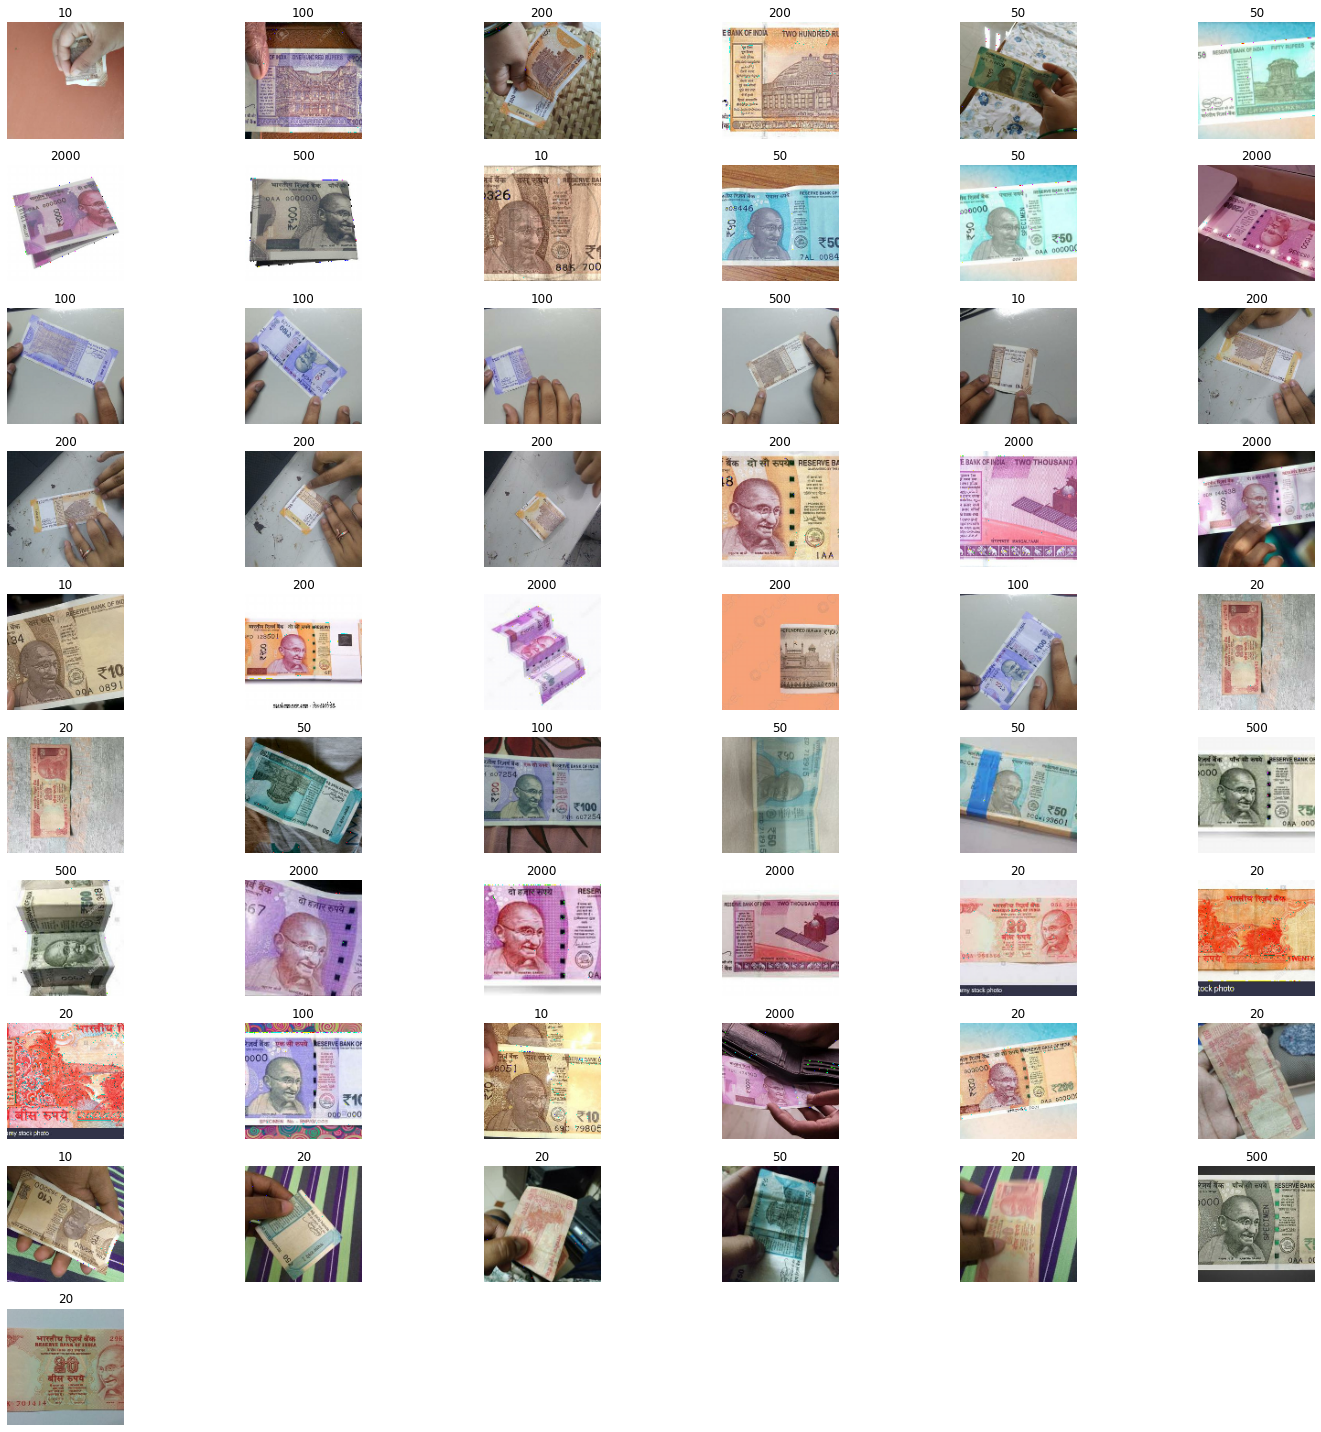

In [23]:
subplot_rows = num_test_images//6 + (1 if num_test_images%6!=0 else 0)
subplot_columns = num_test_images if num_test_images<6 else 6

plt.figure(figsize=(20, 20))
i = 0     # Iterator

for images in test_images:
  ax = plt.subplot(subplot_rows, subplot_columns, i + 1)
  plt.imshow((np.squeeze(images) * 255).astype(np.uint8), cmap = 'gray')
  plt.title(pred_output_labels[i])
  plt.axis("off")
  i = i + 1

plt.tight_layout()
plt.show()

##**Loading the saved model**


In [24]:
infer_model = tf.keras.models.load_model('C:\\Users\\Chetan\OneDrive - kletech.ac.in\\Desktop\\Indian-Currency-Classification-main\\model\\')

# Check its architecture
infer_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      256       
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      18464     
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)     

##**Checking whether model loaded correctly**


In [25]:
val_loss, val_acc = infer_model.evaluate(validation_dataset, verbose='auto')
print(f"Restored model Validation:\n\tloss:{val_loss} \n\taccuracy:{val_acc}")

8/8 [==============================] - 4s 410ms/step - loss: 0.0695 - accuracy: 0.9879
Restored model Validation:
	loss:0.06953217834234238 
	accuracy:0.9878542423248291


In [1]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)



In [ ]:
model = tf.keras.models.load_model('C:\\Users\\Chetan\\OneDrive - kletech.ac.in\\Desktop\\Indian-Currency-Classification-main\\model\\')

# Check its architecture
model.summary()

#### *It did load as expected as the previous validation accuracy matches the current one.*